In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from isyatirimhisse import fetch_data, fetch_financials, visualize_data

In [2]:
zoren=yf.download("ZOREN.IS",start="2011-12-30",end="2023-10-01")


[*********************100%%**********************]  1 of 1 completed


In [7]:
symbol='ZOREN'
start_year='2011'
end_year='2023'
save_to_excel=True
language='tr'

veri = fetch_financials(
    symbol=symbol,
    start_year=start_year,
    end_year=end_year,
    save_to_excel=save_to_excel,
    language=language
)
bilanco=pd.read_excel("finansallar_ZOREn_20231002.xlsx")
bilanco=bilanco.T


In [8]:
bilanco.columns=bilanco.iloc[1]
bilanco=bilanco.drop([bilanco.index[0],bilanco.index[1]])
bilanco["Çeyreklik Kar"]=0


In [9]:
for i in range(0,50):
   if i%4==0:
      bilanco["Çeyreklik Kar"].iloc[i]=bilanco["DÖNEM KARI (ZARARI)"].iloc[i]
   else:
      bilanco["Çeyreklik Kar"].iloc[i]=bilanco["DÖNEM KARI (ZARARI)"].iloc[i]-bilanco["DÖNEM KARI (ZARARI)"].iloc[i-1]
bilanco["Çeyreklik Kar"]

C:\Users\Bora\AppData\Local\Temp\ipykernel_3400\3152838637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilanco["Çeyreklik Kar"].iloc[i]=bilanco["DÖNEM KARI (ZARARI)"].iloc[i]
C:\Users\Bora\AppData\Local\Temp\ipykernel_3400\3152838637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilanco["Çeyreklik Kar"].iloc[i]=bilanco["DÖNEM KARI (ZARARI)"].iloc[i]-bilanco["DÖNEM KARI (ZARARI)"].iloc[i-1]
C:\Users\Bora\AppData\Local\Temp\ipykernel_3400\3152838637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

2011/3      -80902000
2011/6     -128794000
2011/9     -163011000
2011/12     -99963000
2012/3       65846000
2012/6      -39857000
2012/9      -59490000
2012/12     615563000
2013/3      -21271000
2013/6      -53980000
2013/9     -109412000
2013/12    -121036000
2014/3      -87835000
2014/6       23910000
2014/9      -93745000
2014/12     -66778000
2015/3     -136692000
2015/6      -70938000
2015/9     -174024000
2015/12     117868000
2016/3      -13873000
2016/6      -45655000
2016/9      -66859000
2016/12     121884000
2017/3      -52211000
2017/6       88862000
2017/9        8118000
2017/12     -11890000
2018/3       36265000
2018/6       30684000
2018/9     -132130000
2018/12      70196000
2019/3       31038000
2019/6      -60074000
2019/9      -32058000
2019/12     -76762000
2020/3       36323000
2020/6        4051000
2020/9       18555000
2020/12     -20722000
2021/3      -34435000
2021/6       -9390000
2021/9      -42274000
2021/12     -73335000
2022/3       73176000
2022/6    

In [10]:
bilanco["Yıllıklandırılmış Kar"]=bilanco["Çeyreklik Kar"].rolling(4).sum()
bilanco["Yıllıklandırılmış Kar"]



2011/3              NaN
2011/6              NaN
2011/9              NaN
2011/12   -4.726700e+08
2012/3    -3.259220e+08
2012/6    -2.369850e+08
2012/9    -1.334640e+08
2012/12    5.820620e+08
2013/3     4.949450e+08
2013/6     4.808220e+08
2013/9     4.309000e+08
2013/12   -3.056990e+08
2014/3    -3.722630e+08
2014/6    -2.943730e+08
2014/9    -2.787060e+08
2014/12   -2.244480e+08
2015/3    -2.733050e+08
2015/6    -3.681530e+08
2015/9    -4.484320e+08
2015/12   -2.637860e+08
2016/3    -1.409670e+08
2016/6    -1.156840e+08
2016/9    -8.519000e+06
2016/12   -4.503000e+06
2017/3    -4.284100e+07
2017/6     9.167600e+07
2017/9     1.666530e+08
2017/12    3.287900e+07
2018/3     1.213550e+08
2018/6     6.317700e+07
2018/9    -7.707100e+07
2018/12    5.015000e+06
2019/3    -2.120000e+05
2019/6    -9.097000e+07
2019/9     9.102000e+06
2019/12   -1.378560e+08
2020/3    -1.325710e+08
2020/6    -6.844600e+07
2020/9    -1.783300e+07
2020/12    3.820700e+07
2021/3    -3.255100e+07
2021/6    -4.599

In [11]:
bilanco=bilanco.tail(47)

<Axes: title={'center': 'Yıllık Kar'}>

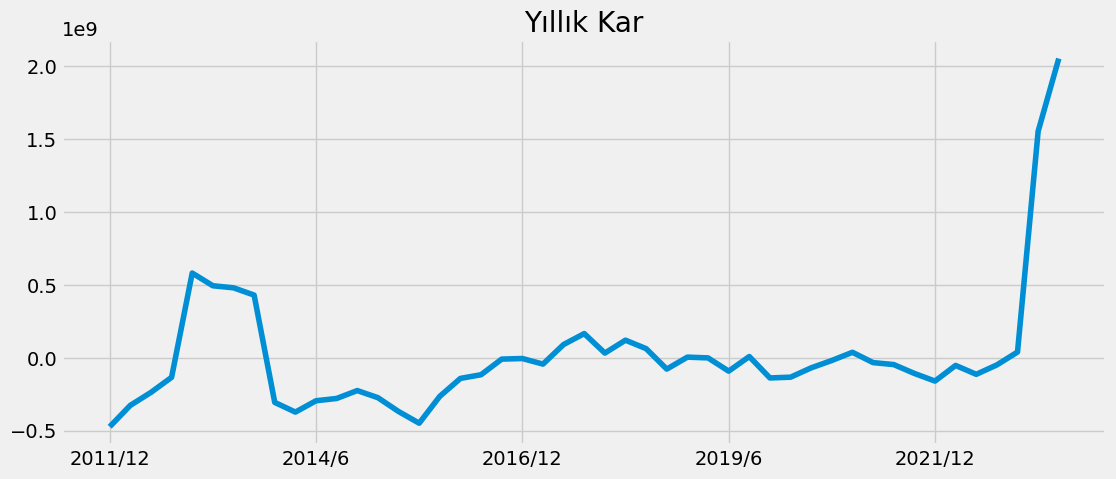

In [12]:
bilanco["Yıllıklandırılmış Kar"].plot(kind="line",figsize=(12,5),title="Yıllık Kar")




In [13]:
fiyat=pd.DataFrame()
dönem=pd.date_range(start="2011-12-30",end="2023-10-01",freq="Q")
fiyat["Fiyat"]=zoren["Close"].resample("Q").last()



# Güncellenmiş DataFrame'i gösterelim
fiyat

,Fiyat
Date,
2011-12-31,0.972197
2012-03-31,1.149558
2012-06-30,0.837715
2012-09-30,0.814445
2012-12-31,0.892012
2013-03-31,1.264330
2013-06-30,0.946308
2013-09-30,1.008361
2013-12-31,0.806689


In [14]:
dönem=pd.date_range(start="2011-12-31",end="2023-07-01",freq="Q")
bilanco=bilanco.set_index(dönem)
bilanco

ZOREN,Dönen Varlıklar,Nakit ve Nakit Benzerleri,Finansal Yatırımlar,Ticari Alacaklar,Finans Sektörü Faaliyetlerinden Alacaklar,Diğer Alacaklar,Stoklar,Canlı Varlıklar,Diğer Dönen Varlıklar,(Ara Toplam),...,Finansman Faaliyetlerden Kaynaklanan Nakit,Yab. Para Çev. Fark. Etk. Önc.Nak.Ve Nak. Benz. Net Artış/Azalış,Yab.ı Para Çevrim Fark. Nakit Ve Nakit Benz. Üzerindeki Etkisi,Diğer Nakit Girişi/Çıkışı,Nakit ve Benzerlerindeki Değişim,Diğer Nakit ve Nakit Benzerlerindeki Artış,Dönem Başı Nakit Değerler,Dönem Sonu Nakit,Çeyreklik Kar,Yıllıklandırılmış Kar
2011-12-31,620388000.0,68469000.0,113612000.0,40835000.0,0.0,222353000.0,5711000.0,0.0,169408000.0,620388000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99963000,-4.726700e+08
2012-03-31,577866000,203746000,0,62383000,0,210967000,5994000,0,94776000,577866000,...,4598000,98429000,2748000,0,101177000,0,68469000,169646000,65846000,-3.259220e+08
2012-06-30,530464000.0,125986000.0,0.0,84831000.0,0.0,222298000.0,7568000.0,0.0,89781000.0,530464000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39857000,-2.369850e+08
2012-09-30,534154000.0,98818000.0,35960000.0,25427000.0,0.0,260424000.0,8831000.0,0.0,104694000.0,534154000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-59490000,-1.334640e+08
2012-12-31,581471000.0,187379000.0,0.0,35876000.0,0.0,295110000.0,0.0,0.0,63106000.0,581471000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,615563000,5.820620e+08
2013-03-31,551735000,233665000,0,64075000,0,173372000,12016000,0,68607000,551735000,...,84073000,45371000,0,0,45371000,0,107903000,153274000,-21271000,4.949450e+08
2013-06-30,581879000.0,216293000.0,0.0,67454000.0,0.0,238290000.0,12281000.0,0.0,47561000.0,581879000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-53980000,4.808220e+08
2013-09-30,471526000.0,172119000.0,0.0,94649000.0,0.0,127843000.0,11552000.0,0.0,65363000.0,471526000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-109412000,4.309000e+08
2013-12-31,534013000.0,164421000.0,49412000.0,116133000.0,0.0,125340000.0,0.0,0.0,78707000.0,534013000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-121036000,-3.056990e+08
2014-03-31,562518000.0,116468000.0,0.0,151217000.0,0.0,230691000.0,0.0,0.0,64142000.0,562518000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87835000,-3.722630e+08


In [15]:

bilanco=bilanco.loc[:, (bilanco != 0).all(axis=0)]
bilanco

ZOREN,Dönen Varlıklar,Nakit ve Nakit Benzerleri,Ticari Alacaklar,Diğer Alacaklar,Diğer Dönen Varlıklar,(Ara Toplam),Duran Varlıklar,Diğer Alacaklar,Finansal Yatırımlar,Maddi Duran Varlıklar,...,Yatırım Faaliyetlerinden Kaynaklanan Nakit,Serbest Nakit Akım,Diğer Finansman Faaliyetlerinden Nakit,Finansman Faaliyetlerden Kaynaklanan Nakit,Yab. Para Çev. Fark. Etk. Önc.Nak.Ve Nak. Benz. Net Artış/Azalış,Nakit ve Benzerlerindeki Değişim,Dönem Başı Nakit Değerler,Dönem Sonu Nakit,Çeyreklik Kar,Yıllıklandırılmış Kar
2011-12-31,620388000.0,68469000.0,40835000.0,222353000.0,169408000.0,620388000.0,2789325000.0,214160000.0,22836000.0,2465160000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99963000,-4.726700e+08
2012-03-31,577866000,203746000,62383000,210967000,94776000,577866000,2802846000,191070000,27088000,2503472000,...,-11322000,93831000,4598000,4598000,98429000,101177000,68469000,169646000,65846000,-3.259220e+08
2012-06-30,530464000.0,125986000.0,84831000.0,222298000.0,89781000.0,530464000.0,2798597000.0,184374000.0,32927000.0,2501563000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39857000,-2.369850e+08
2012-09-30,534154000.0,98818000.0,25427000.0,260424000.0,104694000.0,534154000.0,2943311000.0,183059000.0,39940000.0,2640463000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-59490000,-1.334640e+08
2012-12-31,581471000.0,187379000.0,35876000.0,295110000.0,63106000.0,581471000.0,3944507000.0,2112562000.0,8591000.0,1686892000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,615563000,5.820620e+08
2013-03-31,551735000,233665000,64075000,173372000,68607000,551735000,4423610000,2126354000,8591000,1187042000,...,3153000,-38702000,-72942000,84073000,45371000,45371000,107903000,153274000,-21271000,4.949450e+08
2013-06-30,581879000.0,216293000.0,67454000.0,238290000.0,47561000.0,581879000.0,4676265000.0,2289974000.0,8591000.0,2126829000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-53980000,4.808220e+08
2013-09-30,471526000.0,172119000.0,94649000.0,127843000.0,65363000.0,471526000.0,4971243000.0,2443296000.0,8591000.0,2242521000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-109412000,4.309000e+08
2013-12-31,534013000.0,164421000.0,116133000.0,125340000.0,78707000.0,534013000.0,5767605000.0,2566830000.0,8591000.0,3058226000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-121036000,-3.056990e+08
2014-03-31,562518000.0,116468000.0,151217000.0,230691000.0,64142000.0,562518000.0,5893055000.0,2656715000.0,8591000.0,3072185000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87835000,-3.722630e+08


In [16]:
from evds import evdsAPI
from datetime import date
evds=evdsAPI('dsIC3fiGlu')
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-10-2011",enddate="01-06-2023",frequency=5)
usd=usd.set_index(pd.date_range(start="2011-10-31",end="2023-07-01",freq="M"))
del usd["Tarih"]
usd=usd.resample("Q").last()
usd.columns=["USDTRY"]
usd

,USDTRY
2011-12-31,1.867823
2012-03-31,1.787882
2012-06-30,1.824833
2012-09-30,1.804275
2012-12-31,1.787676
2013-03-31,1.810457
2013-06-30,1.897915
2013-09-30,2.020786
2013-12-31,2.061532
2014-03-31,2.221786


In [17]:
bist100=evds.get_data(["TP.MK.F.BILESIK"],startdate="01-10-2011",enddate="01-06-2023",frequency=5)
bist100=bist100.set_index(pd.date_range(start="2011-10-31",end="2023-07-01",freq="M"))
del bist100["Tarih"]
bist100=bist100.resample("Q").last()
bist100.columns=["BIST100"]
bist100

,BIST100
2011-12-31,521.31
2012-03-31,623.23
2012-06-30,615.25
2012-09-30,667.25
2012-12-31,784.77
2013-03-31,857.35
2013-06-30,769.11
2013-09-30,743.60
2013-12-31,678.02
2014-03-31,694.98


In [18]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-10-2011",enddate="01-06-2023",frequency=5)
enf=enf.set_index(pd.date_range(start="2011-10-31",end="2023-07-01",freq="M"))
del enf["Tarih"]
enf=enf.resample("Q").last()
enf.columns=["TÜFE"]
enf

,TÜFE
2011-12-31,200.85
2012-03-31,203.96
2012-06-30,204.76
2012-09-30,207.55
2012-12-31,213.23
2013-03-31,218.83
2013-06-30,221.75
2013-09-30,223.91
2013-12-31,229.01
2014-03-31,237.18


In [20]:

bilanco=bilanco.dropna(axis=1,how="any")
bilanco["TÜFE"]=enf["TÜFE"]
bilanco["BIST100"]=bist100["BIST100"]
bilanco["USDTRY"]=usd["USDTRY"]
bilanco["Fiyat"]=fiyat["Fiyat"].head(47)




C:\Users\Bora\AppData\Local\Temp\ipykernel_3400\1760472257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilanco["TÜFE"]=enf["TÜFE"]
C:\Users\Bora\AppData\Local\Temp\ipykernel_3400\1760472257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilanco["BIST100"]=bist100["BIST100"]
C:\Users\Bora\AppData\Local\Temp\ipykernel_3400\1760472257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [295]:
X=bilanco.iloc[:,:61]
y=bilanco.iloc[:,61]

In [246]:
for i in X.columns:
    X[i]=X[i].astype(float)


In [296]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Veri ölçekleme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# PCA uygulama
pca = PCA(n_components=10)  
principal_components = pca.fit_transform(scaled_data)

# Varyansı kontrol et
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.70637812, 0.10781232, 0.05249777, 0.03512305, 0.01833984,
       0.01740295, 0.01681121, 0.01306874, 0.00832257, 0.00655536])

In [297]:
X=principal_components #Regresyon sonucunda anlamsız çıkan parametreleri sildim
y=bilanco["Fiyat"]


In [298]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [299]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm

#model = LinearRegression()
model=sm.OLS(y_train,X_train)

X_train_with_const = sm.add_constant(X_train)

# Reset the index of y_train to match the index of X_train
y_train_reset_index = y_train.reset_index(drop=True)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train_reset_index, X_train_with_const)
results = model_ols.fit()

# Modelin özetini görüntüleyin
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Fiyat   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     18.98
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           2.44e-08
Time:                        00:01:30   Log-Likelihood:                -14.531
No. Observations:                  32   AIC:                             51.06
Df Residuals:                      21   BIC:                             67.19
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7306      0.086     20.131      0.0

In [300]:
tahmin1=pd.DataFrame(results.predict(sm.add_constant(X_test)),columns=["Tahmin"],index=y_test.index)
tahmin1["Gerçek"]=y_test
tahmin1=tahmin1.sort_index()
mse=np.mean((tahmin1["Tahmin"]-tahmin1["Gerçek"])**2)
mse

0.24286366004577484

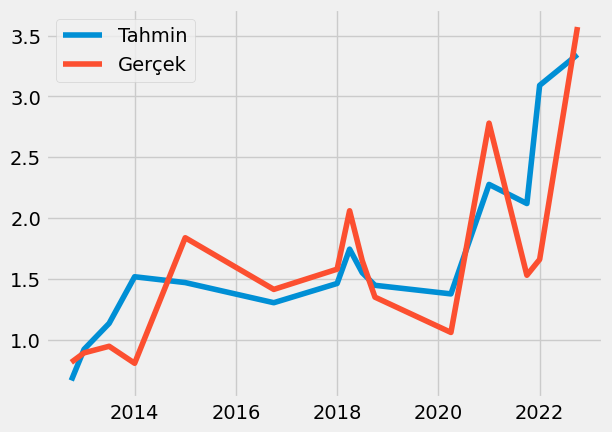

In [301]:
import matplotlib.pyplot as plt
plt.plot(tahmin1["Tahmin"],label="Tahmin")
plt.plot(tahmin1["Gerçek"],label="Gerçek")
plt.legend()

In [302]:
X=bilanco.iloc[:,:61]
y=bilanco.iloc[:,61]

In [303]:
for i in X.columns:
    X[i]=X[i].astype(float)

In [304]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np


# Tahminleri saklamak için bir liste
predictions = []

# Her bir sütun için döngü
for i in range(0,61):  
    # SARIMAX modelini oluşturma
    sarimax_model = SARIMAX(X.iloc[:, i], 
                            order=(0, 1, 1), 
                            seasonal_order=(0, 1, 1, 4))  # Çeyreklik veri için mevsimsel periyot 4

    # Modeli eğitme
    sarimax_fit = sarimax_model.fit(disp=False)

    # Modelin özeti (isteğe bağlı)
    print(sarimax_fit.summary())

    # Gelecekteki 6 değeri tahmin etme
    future_predictions = sarimax_fit.get_forecast(steps=6).predicted_mean

    # Tahminleri listeye ekleme
    predictions.append(future_predictions)

# Tahminleri bir DataFrame'e dönüştürme
predictions_df = pd.DataFrame(predictions).T  # Transpoze alarak sütunlarla satırları ters çeviriyoruz
predictions_df.columns = X.columns  # Sütun adlarını X DataFrame'inden alıyoruz


extended_X = pd.concat([X, predictions_df], ignore_index=True)



                                     SARIMAX Results                                     
Dep. Variable:                   Dönen Varlıklar   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                -931.020
Date:                           Tue, 03 Oct 2023   AIC                           1868.040
Time:                                   00:01:44   BIC                           1873.253
Sample:                               12-31-2011   HQIC                          1869.950
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1317      0.197      0.668      0.504      -0.255       0.518
ma.S.L4       -0.7963      0.336     -2.368

In [305]:
extended_X=extended_X.set_index(pd.date_range(start="2011-12-31",end="2025-01-01",freq="Q"))
extended_X["Yıllıklandırılmış Kar"]=extended_X["Çeyreklik Kar"].rolling(4).sum()
extended_X["HBK"]=extended_X["Yıllıklandırılmış Kar"]/extended_X["Ödenmiş Sermaye"]
extended_X=extended_X.dropna()
extended_X

ZOREN,Dönen Varlıklar,Nakit ve Nakit Benzerleri,Ticari Alacaklar,Diğer Alacaklar,Diğer Dönen Varlıklar,(Ara Toplam),Duran Varlıklar,Diğer Alacaklar,Finansal Yatırımlar,Maddi Duran Varlıklar,...,Ana Ortaklık Payları,Amortisman Giderleri,Finansman Giderleri,Net Yabancı Para Pozisyonu,Çeyreklik Kar,Yıllıklandırılmış Kar,TÜFE,BIST100,USDTRY,HBK
2012-09-30,5.341540e+08,9.881800e+07,2.542700e+07,2.604240e+08,1.046940e+08,5.341540e+08,2.943311e+09,1.830590e+08,3.994000e+07,2.640463e+09,...,1.359600e+07,7.490700e+07,-1.867070e+08,-2.254447e+09,-5.949000e+07,-1.334640e+08,207.550000,667.250000,1.804275,-0.266928
2012-12-31,5.814710e+08,1.873790e+08,3.587600e+07,2.951100e+08,6.310600e+07,5.814710e+08,3.944507e+09,2.112562e+09,8.591000e+06,1.686892e+09,...,5.985850e+08,1.688270e+08,-3.154480e+08,-9.307040e+08,6.155630e+08,5.820620e+08,213.230000,784.770000,1.787676,1.164124
2013-03-31,5.517350e+08,2.336650e+08,6.407500e+07,1.733720e+08,6.860700e+07,5.517350e+08,4.423610e+09,2.126354e+09,8.591000e+06,1.187042e+09,...,-2.088200e+07,2.645300e+07,-8.943300e+07,-9.676390e+08,-2.127100e+07,4.949450e+08,218.830000,857.350000,1.810457,0.989890
2013-06-30,5.818790e+08,2.162930e+08,6.745400e+07,2.382900e+08,4.756100e+07,5.818790e+08,4.676265e+09,2.289974e+09,8.591000e+06,2.126829e+09,...,-7.412400e+07,5.796900e+07,-2.464370e+08,-1.332658e+09,-5.398000e+07,4.808220e+08,221.750000,769.110000,1.897915,0.961644
2013-09-30,4.715260e+08,1.721190e+08,9.464900e+07,1.278430e+08,6.536300e+07,4.715260e+08,4.971243e+09,2.443296e+09,8.591000e+06,2.242521e+09,...,-1.832970e+08,8.703000e+07,-4.444580e+08,-1.459890e+09,-1.094120e+08,4.309000e+08,223.910000,743.600000,2.020786,0.861800
2013-12-31,5.340130e+08,1.644210e+08,1.161330e+08,1.253400e+08,7.870700e+07,5.340130e+08,5.767605e+09,2.566830e+09,8.591000e+06,3.058226e+09,...,-3.091710e+08,1.247460e+08,-6.171080e+08,-1.402319e+09,-1.210360e+08,-3.056990e+08,229.010000,678.020000,2.061532,-0.611398
2014-03-31,5.625180e+08,1.164680e+08,1.512170e+08,2.306910e+08,6.414200e+07,5.625180e+08,5.893055e+09,2.656715e+09,8.591000e+06,3.072185e+09,...,-8.711800e+07,3.661400e+07,-1.809680e+08,-1.464251e+09,-8.783500e+07,-3.722630e+08,237.180000,694.980000,2.221786,-0.744526
2014-06-30,2.300658e+09,6.983100e+07,1.143550e+08,1.989182e+09,7.815700e+07,2.300658e+09,4.059161e+09,8.459630e+08,8.591000e+06,3.065534e+09,...,-6.321500e+07,7.200400e+07,-2.393490e+08,-1.152411e+09,2.391000e+07,-2.943730e+08,242.070000,790.400000,2.119538,-0.588746
2014-09-30,4.120050e+08,7.258600e+07,1.151700e+08,1.582020e+08,6.023500e+07,4.120050e+08,4.270728e+09,9.982520e+08,8.591000e+06,3.097819e+09,...,-1.568770e+08,1.037460e+08,-5.825840e+08,-1.256135e+09,-9.374500e+07,-2.787060e+08,243.740000,747.140000,2.207559,-0.557412
2014-12-31,5.936520e+08,1.086320e+08,1.022090e+08,3.273570e+08,4.951400e+07,5.936520e+08,4.369129e+09,1.020119e+09,2.460000e+05,3.160710e+09,...,-2.242400e+08,1.395820e+08,-7.008570e+08,-1.385380e+09,-6.677800e+07,-2.244480e+08,247.720000,848.380000,2.291783,-0.448896


In [306]:
bist100=evds.get_data(["TP.MK.F.BILESIK"],startdate="01-10-2011",enddate="01-10-2023",frequency=5)
bist100=bist100.set_index(pd.date_range(start="2011-10-31",end="2023-10-01",freq="M"))
del bist100["Tarih"]
bist100.columns=["BIST100"]
bist100

,BIST100
2011-10-31,565.87
2011-11-30,529.97
2011-12-31,521.31
2012-01-31,583.23
2012-02-29,602.36
...,...
2023-05-31,4886.91
2023-06-30,5759.11
2023-07-31,7216.96
2023-08-31,7917.93


In [307]:
best_sarimax_model = SARIMAX(bist100, 
                             order=(1, 1, 1), 
                             seasonal_order=(1, 1, 1, 4))
best_sarimax_fit = best_sarimax_model.fit(disp=False)
future_predictions = best_sarimax_fit.get_forecast(steps=15).predicted_mean
future_predictions=pd.DataFrame(future_predictions)
future_predictions=future_predictions.set_index(pd.date_range(start="2023-10-01",end="2025-01-01",freq="M"))
future_predictions.columns=["BIST100"]
future_predictions


,BIST100
2023-10-31,8812.732548
2023-11-30,9035.608937
2023-12-31,9246.592061
2024-01-31,9265.084744
2024-02-29,9784.144852
2024-03-31,10456.644413
2024-04-30,10836.101851
2024-05-31,11001.488881
2024-06-30,11492.429331
2024-07-31,11970.806753


In [308]:
bist100=pd.concat([bist100,future_predictions], ignore_index=True)
bist100=bist100.set_index(pd.date_range(start="2011-10-31",end="2025-01-01",freq="M"))
bist100=bist100.resample("Q").last()
bist100

,BIST100
2011-12-31,521.310000
2012-03-31,623.230000
2012-06-30,615.250000
2012-09-30,667.250000
2012-12-31,784.770000
2013-03-31,857.350000
2013-06-30,769.110000
2013-09-30,743.600000
2013-12-31,678.020000
2014-03-31,694.980000


In [309]:
extended_X.iloc[44:,58]=[1700,1905,2323,2617,3129,3554] #TÜFE Tahminlerim
extended_X.iloc[44:,59]=bist100["BIST100"].tail(6) #BIST100 Tahminlerim
extended_X.iloc[44:,60]=[26.94,30.41,34.65,36.67,41,46.45] #USDTRY Tahminlerim
#TÜFE ve USDTRY tahminlerimi InflationForecast projemden aldım,onu da inceleyebilirsiniz.


In [310]:
X=extended_X.iloc[:,:61]
y=bilanco["Fiyat"].tail(44)
y

2012-09-30    0.814445
2012-12-31    0.892012
2013-03-31    1.264330
2013-06-30    0.946308
2013-09-30    1.008361
2013-12-31    0.806689
2014-03-31    0.868742
2014-06-30    0.892012
2014-09-30    1.101441
2014-12-31    1.838320
2015-03-31    1.458246
2015-06-30    1.357409
2015-09-30    1.116954
2015-12-31    1.484771
2016-03-31    1.484771
2016-06-30    1.555898
2016-09-30    1.413644
2016-12-31    1.271391
2017-03-31    1.160000
2017-06-30    1.360000
2017-09-30    1.540000
2017-12-31    1.580000
2018-03-31    2.060000
2018-06-30    1.650000
2018-09-30    1.350000
2018-12-31    1.240000
2019-03-31    1.240000
2019-06-30    1.180000
2019-09-30    1.270000
2019-12-31    1.640000
2020-03-31    1.060000
2020-06-30    2.060000
2020-09-30    2.600000
2020-12-31    2.780000
2021-03-31    2.310000
2021-06-30    1.830000
2021-09-30    1.530000
2021-12-31    1.660000
2022-03-31    1.850000
2022-06-30    1.920000
2022-09-30    3.570000
2022-12-31    7.110000
2023-03-31    4.320000
2023-06-30 

In [311]:


# Veri ölçekleme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# PCA uygulama
pca = PCA(n_components=10)  
principal_components1 = pca.fit_transform(scaled_data)

# Varyansı kontrol et
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.77933893, 0.07891528, 0.04080704, 0.02911757, 0.01761463,
       0.0168691 , 0.00814512, 0.00740195, 0.00564354, 0.00399918])

In [312]:
y=bilanco["Fiyat"]
y.loc[pd.Timestamp('2023-09-30')] = 5.70
y=y.tail(45)
y

2012-09-30    0.814445
2012-12-31    0.892012
2013-03-31    1.264330
2013-06-30    0.946308
2013-09-30    1.008361
2013-12-31    0.806689
2014-03-31    0.868742
2014-06-30    0.892012
2014-09-30    1.101441
2014-12-31    1.838320
2015-03-31    1.458246
2015-06-30    1.357409
2015-09-30    1.116954
2015-12-31    1.484771
2016-03-31    1.484771
2016-06-30    1.555898
2016-09-30    1.413644
2016-12-31    1.271391
2017-03-31    1.160000
2017-06-30    1.360000
2017-09-30    1.540000
2017-12-31    1.580000
2018-03-31    2.060000
2018-06-30    1.650000
2018-09-30    1.350000
2018-12-31    1.240000
2019-03-31    1.240000
2019-06-30    1.180000
2019-09-30    1.270000
2019-12-31    1.640000
2020-03-31    1.060000
2020-06-30    2.060000
2020-09-30    2.600000
2020-12-31    2.780000
2021-03-31    2.310000
2021-06-30    1.830000
2021-09-30    1.530000
2021-12-31    1.660000
2022-03-31    1.850000
2022-06-30    1.920000
2022-09-30    3.570000
2022-12-31    7.110000
2023-03-31    4.320000
2023-06-30 

In [313]:
X=principal_components1[:45]#Regresyonda anlamsız çıkan parametreyi çıkardım

In [314]:

#model = LinearRegression()
model=sm.OLS(y,X)

X_train_with_const = sm.add_constant(X)

# Reset the index of y_train to match the index of X_train
y_train_reset_index = y.reset_index(drop=True)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train_reset_index, X_train_with_const)
results = model_ols.fit()

# Modelin özetini görüntüleyin
print(results.summary())






                            OLS Regression Results                            
Dep. Variable:                  Fiyat   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     26.33
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           3.71e-13
Time:                        00:02:10   Log-Likelihood:                -24.543
No. Observations:                  45   AIC:                             71.09
Df Residuals:                      34   BIC:                             90.96
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3478      0.095     24.732      0.0

In [315]:
tahmin3=pd.DataFrame(results.predict(sm.add_constant(principal_components1)),index=pd.date_range(start="2012-09-30",end="2025-01-01",freq="Q"),columns=["Tahmin"])
tahmin3

,Tahmin
2012-09-30,0.688834
2012-12-31,1.089702
2013-03-31,1.001523
2013-06-30,0.927762
2013-09-30,0.971975
2013-12-31,1.396916
2014-03-31,1.064174
2014-06-30,0.474896
2014-09-30,1.450993
2014-12-31,1.517383


In [316]:
y

2012-09-30    0.814445
2012-12-31    0.892012
2013-03-31    1.264330
2013-06-30    0.946308
2013-09-30    1.008361
2013-12-31    0.806689
2014-03-31    0.868742
2014-06-30    0.892012
2014-09-30    1.101441
2014-12-31    1.838320
2015-03-31    1.458246
2015-06-30    1.357409
2015-09-30    1.116954
2015-12-31    1.484771
2016-03-31    1.484771
2016-06-30    1.555898
2016-09-30    1.413644
2016-12-31    1.271391
2017-03-31    1.160000
2017-06-30    1.360000
2017-09-30    1.540000
2017-12-31    1.580000
2018-03-31    2.060000
2018-06-30    1.650000
2018-09-30    1.350000
2018-12-31    1.240000
2019-03-31    1.240000
2019-06-30    1.180000
2019-09-30    1.270000
2019-12-31    1.640000
2020-03-31    1.060000
2020-06-30    2.060000
2020-09-30    2.600000
2020-12-31    2.780000
2021-03-31    2.310000
2021-06-30    1.830000
2021-09-30    1.530000
2021-12-31    1.660000
2022-03-31    1.850000
2022-06-30    1.920000
2022-09-30    3.570000
2022-12-31    7.110000
2023-03-31    4.320000
2023-06-30 

In [317]:
tahmin3.index = pd.to_datetime(tahmin3.index)
tahmin3.index = tahmin3.index.date
y.index = pd.to_datetime(y.index)
y.index = y.index.date

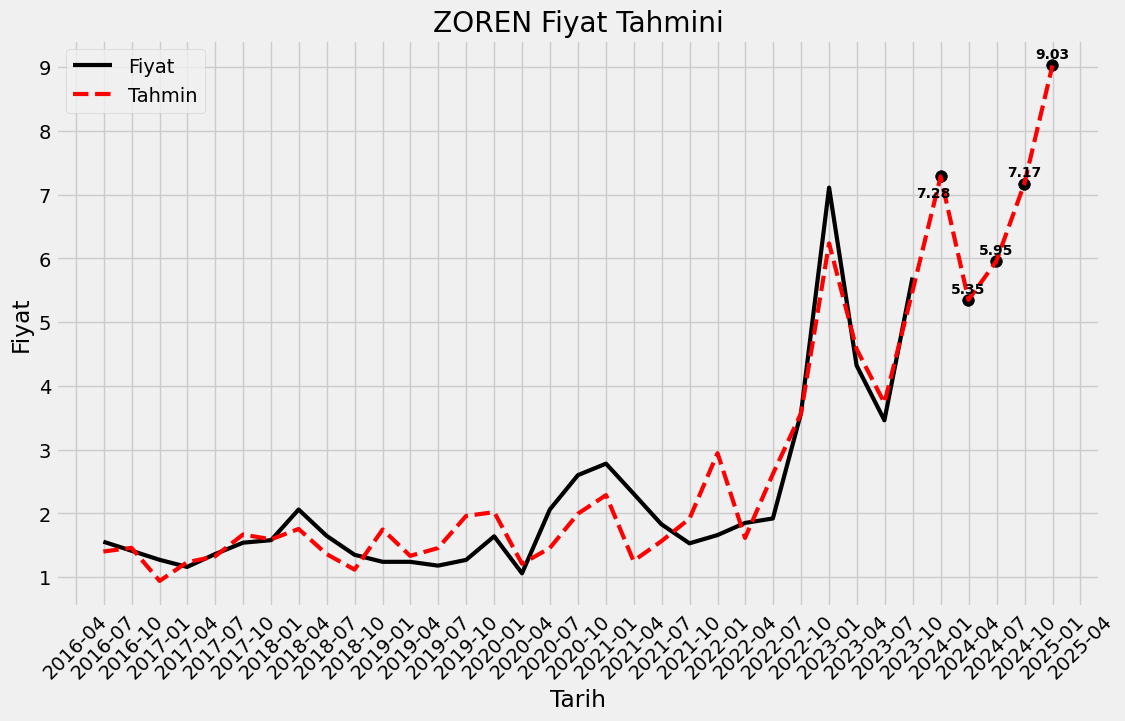

In [319]:
import matplotlib.dates as mdates
y.tail(30).plot(figsize=(12,7),label="Fiyat",color="black",linestyle="-",lw=3)
tahmin3["Tahmin"].tail(35).plot(label="Tahmin",color="red",linestyle="--",lw=3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))  # Çeyrekler için ay ayırıcıları
plt.xticks(rotation=45)
plt.scatter(tahmin3.index[-5::],tahmin3["Tahmin"][-5::],color="black",marker="o",s=70)
plt.title("ZOREN Fiyat Tahmini")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")

for i in range(-5,-4):
    plt.annotate(str(round(tahmin3["Tahmin"][i],2)), (tahmin3.index[i], tahmin3["Tahmin"][i]), textcoords="offset points", xytext=(-5,-15), ha='center',weight="bold",fontsize=10)
for i in range(-4,0):
    plt.annotate(str(round(tahmin3["Tahmin"][i],2)), (tahmin3.index[i], tahmin3["Tahmin"][i]), textcoords="offset points", xytext=(0,5), ha='center',fontsize=10,weight="bold")


plt.legend()
plt.show()